In [1]:
# Import dependencies

import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
import tensorflow as tf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read in data set
climate_df = pd.read_csv('ML_input.csv')
print(climate_df.shape)
climate_df.head()

(1056, 25)


state_name  year      tempc  co2_emissions  population_thousands  \
0     Alabama  1997  16.870370          134.9                  4368   
1    Arkansas  1997  15.365741           59.6                  2601   
2     Arizona  1997  15.847222           71.8                  4737   
3  California  1997  15.064815          346.6                 32486   
4    Colorado  1997   7.134259           75.7                  4018   

   rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  pe_nuclear  ...  \
0         143646   867264        524929         337431      310336  ...   
1          82756   246786        320440         264019      149100  ...   
2         168550   369872        430092         137588      307623  ...   
3        1378654    82651       3292194        2185029      320194  ...   
4         184193   362423        371516         311900           0  ...   

   drought  flooding  freeze  severe_storm  tropical_cyclone  wildfire  \
0        0         0       0             0                 0         0   
1        0         0       0             1                 0         0   
2        0         0       0             0                 0         0   
3        0         1       0             0                 0         0   
4        0         0       0             0                 0         0   

   winter_storm  state_abb      tempf  pe_totalrenew  
0             0         AL  62.366667         300020  
1             0         AR  59.658333         124045  
2             0         AZ  60.525000         143511  
3             0         CA  59.116667         767380  
4             0         CO  44.841667          38515  

[5 rows x 25 columns]

In [3]:
# Describe the numerical columns
climate_df.describe()

year        tempc  co2_emissions  population_thousands  \
count  1056.000000  1056.000000    1056.000000           1056.000000   
mean   2007.500000    11.617056     115.316193           6229.115530   
std       6.347295     4.292796     111.017878           6707.724329   
min    1997.000000     3.620370       5.500000            489.000000   
25%    2002.000000     8.222222      50.300000           1855.750000   
50%    2007.500000    11.118056      86.700000           4448.000000   
75%    2013.000000    14.847222     142.950000           7159.500000   
max    2018.000000    22.976852     701.100000          39462.000000   

       rgdp_millions       pe_coal  pe_petroleum  pe_naturalgas    pe_nuclear  \
count   1.056000e+03  1.056000e+03  1.056000e+03   1.056000e+03  1.056000e+03   
mean    3.113918e+05  4.127799e+05  7.572309e+05   5.087394e+05  1.686339e+05   
std     3.744255e+05  3.976723e+05  9.665282e+05   6.817288e+05  2.107614e+05   
min     2.002600e+04  0.000000e+00  7.524600e+04   5.789000e+03 -1.309000e+03   
25%     8.584825e+04  7.855925e+04  2.344212e+05   1.649898e+05  0.000000e+00   
50%     1.982660e+05  3.271690e+05  5.110925e+05   2.813145e+05  9.865600e+04   
75%     3.932578e+05  6.175798e+05  8.353508e+05   5.667525e+05  3.000062e+05   
max     2.721651e+06  1.695239e+06  6.998850e+06   4.564089e+06  1.031331e+06   

          re_biomass  ...        re_wind      drought     flooding  \
count    1056.000000  ...    1056.000000  1056.000000  1056.000000   
mean    79287.545455  ...   17087.632576     0.305871     0.088068   
std     66923.591892  ...   50334.365969     0.460994     0.299778   
min      1115.000000  ...       0.000000     0.000000     0.000000   
25%     24028.750000  ...       0.000000     0.000000     0.000000   
50%     62951.500000  ...     114.500000     0.000000     0.000000   
75%    121993.750000  ...   11616.250000     1.000000     0.000000   
max    310513.000000  ...  689177.000000     1.000000     2.000000   

            freeze  severe_storm  tropical_cyclone     wildfire  winter_storm  \
count  1056.000000   1056.000000       1056.000000  1056.000000   1056.000000   
mean      0.027462      0.738636          0.165720     0.124053      0.117424   
std       0.163503      1.091919          0.498338     0.329798      0.381366   
min       0.000000      0.000000          0.000000     0.000000      0.000000   
25%       0.000000      0.000000          0.000000     0.000000      0.000000   
50%       0.000000      0.000000          0.000000     0.000000      0.000000   
75%       0.000000      1.000000          0.000000     0.000000      0.000000   
max       1.000000      7.000000          4.000000     1.000000      2.000000   

             tempf  pe_totalrenew  
count  1056.000000   1.056000e+03  
mean     52.910701   1.610993e+05  
std       7.727033   1.905063e+05  
min      38.516667   1.315000e+03  
25%      46.800000   5.091025e+04  
50%      52.012500   1.104195e+05  
75%      58.725000   1.774445e+05  
max      73.358333   1.251196e+06  

[8 rows x 23 columns]

In [4]:
# Look at the min values of each column
climate_df.describe().loc['min',:]

year                     1997.000000
tempc                       3.620370
co2_emissions               5.500000
population_thousands      489.000000
rgdp_millions           20026.000000
pe_coal                     0.000000
pe_petroleum            75246.000000
pe_naturalgas            5789.000000
pe_nuclear              -1309.000000
re_biomass               1115.000000
re_geothermal               0.000000
re_hydropower               0.000000
re_solar                    0.000000
re_wind                     0.000000
drought                     0.000000
flooding                    0.000000
freeze                      0.000000
severe_storm                0.000000
tropical_cyclone            0.000000
wildfire                    0.000000
winter_storm                0.000000
tempf                      38.516667
pe_totalrenew            1315.000000
Name: min, dtype: float64

In [5]:
# Find the rows in the data with negative values for pe_nuclear
climate_df.loc[(climate_df['pe_nuclear'] < 0),:]

state_name  year    tempc  co2_emissions  population_thousands  \
5  Connecticut  1997  9.24537           42.8                  3349   

   rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  pe_nuclear  ...  \
5         190791    44982        427410         148585       -1309  ...   

   drought  flooding  freeze  severe_storm  tropical_cyclone  wildfire  \
5        0         0       0             1                 0         0   

   winter_storm  state_abb      tempf  pe_totalrenew  
5             0         CT  48.641667          51004  

[1 rows x 25 columns]

In [6]:
# Change the pe_nuclear values of those rows to 0
climate_df.loc[5, 'pe_nuclear'] = 0
climate_df.loc[5,:]

state_name              Connecticut
year                           1997
tempc                       9.24537
co2_emissions                  42.8
population_thousands           3349
rgdp_millions                190791
pe_coal                       44982
pe_petroleum                 427410
pe_naturalgas                148585
pe_nuclear                        0
re_biomass                    46243
re_geothermal                     0
re_hydropower                  4562
re_solar                        199
re_wind                           0
drought                           0
flooding                          0
freeze                            0
severe_storm                      1
tropical_cyclone                  0
wildfire                          0
winter_storm                      0
state_abb                        CT
tempf                       48.6417
pe_totalrenew                 51004
Name: 5, dtype: object

In [7]:
# Look at the min values of each column again and verify that there are no negative columns
climate_df.describe().loc['min',:]

year                     1997.000000
tempc                       3.620370
co2_emissions               5.500000
population_thousands      489.000000
rgdp_millions           20026.000000
pe_coal                     0.000000
pe_petroleum            75246.000000
pe_naturalgas            5789.000000
pe_nuclear                  0.000000
re_biomass               1115.000000
re_geothermal               0.000000
re_hydropower               0.000000
re_solar                    0.000000
re_wind                     0.000000
drought                     0.000000
flooding                    0.000000
freeze                      0.000000
severe_storm                0.000000
tropical_cyclone            0.000000
wildfire                    0.000000
winter_storm                0.000000
tempf                      38.516667
pe_totalrenew            1315.000000
Name: min, dtype: float64

# Preprocess data

In [8]:
# Check data types
climate_df.dtypes

state_name               object
year                      int64
tempc                   float64
co2_emissions           float64
population_thousands      int64
rgdp_millions             int64
pe_coal                   int64
pe_petroleum              int64
pe_naturalgas             int64
pe_nuclear                int64
re_biomass                int64
re_geothermal             int64
re_hydropower             int64
re_solar                  int64
re_wind                   int64
drought                   int64
flooding                  int64
freeze                    int64
severe_storm              int64
tropical_cyclone          int64
wildfire                  int64
winter_storm              int64
state_abb                object
tempf                   float64
pe_totalrenew             int64
dtype: object

In [9]:
# Drop state abbreviation variable
climate_df.drop('state_abb', axis='columns', inplace = True)

In [10]:
# Create a df of categorical variables
categorical_df = climate_df.loc[:,['state_name']]

In [11]:
# Create the OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)

In [12]:
# Fit transform the categorical_df 
encoded_df = pd.DataFrame(encoder.fit_transform(categorical_df))
encoded_df.columns = encoder.get_feature_names(categorical_df.columns)
state_dummies = encoded_df.columns.tolist()
encoded_df.head()

state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 0.0                  1.0   
2                 0.0                 1.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  state_name_South Dakota  state_name_Tennessee  \
0               0.0  ...                      0.0                   0.0   
1               0.0  ...                      0.0                   0.0   
2               0.0  ...                      0.0                   0.0   
3               0.0  ...                      0.0                   0.0   
4               0.0  ...                      0.0                   0.0   

   state_name_Texas  state_name_Utah  state_name_Vermont  state_name_Virginia  \
0               0.0              0.0                 0.0                  0.0   
1               0.0              0.0                 0.0                  0.0   
2               0.0              0.0                 0.0                  0.0   
3               0.0              0.0                 0.0                  0.0   
4               0.0              0.0                 0.0                  0.0   

   state_name_Washington  state_name_West Virginia  state_name_Wisconsin  \
0                    0.0                       0.0                   0.0   
1                    0.0                       0.0                   0.0   
2                    0.0                       0.0                   0.0   
3                    0.0                       0.0                   0.0   
4                    0.0                       0.0                   0.0   

   state_name_Wyoming  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 48 columns]

In [13]:
state_dummies

['state_name_Alabama',
 'state_name_Arizona',
 'state_name_Arkansas',
 'state_name_California',
 'state_name_Colorado',
 'state_name_Connecticut',
 'state_name_Delaware',
 'state_name_Florida',
 'state_name_Georgia',
 'state_name_Idaho',
 'state_name_Illinois',
 'state_name_Indiana',
 'state_name_Iowa',
 'state_name_Kansas',
 'state_name_Kentucky',
 'state_name_Louisiana',
 'state_name_Maine',
 'state_name_Maryland',
 'state_name_Massachusetts',
 'state_name_Michigan',
 'state_name_Minnesota',
 'state_name_Mississippi',
 'state_name_Missouri',
 'state_name_Montana',
 'state_name_Nebraska',
 'state_name_Nevada',
 'state_name_New Hampshire',
 'state_name_New Jersey',
 'state_name_New Mexico',
 'state_name_New York',
 'state_name_North Carolina',
 'state_name_North Dakota',
 'state_name_Ohio',
 'state_name_Oklahoma',
 'state_name_Oregon',
 'state_name_Pennsylvania',
 'state_name_Rhode Island',
 'state_name_South Carolina',
 'state_name_South Dakota',
 'state_name_Tennessee',
 'state_name_

In [14]:
# Merge with climate_df
climate_df = encoded_df.merge(climate_df, left_index= True, right_index= True)

# Drop state_name column
climate_df.drop('state_name', axis = 'columns', inplace = True)

climate_df.head()

state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 0.0                  1.0   
2                 0.0                 1.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  re_wind  drought  flooding  freeze  severe_storm  \
0               0.0  ...        0        0         0       0             0   
1               0.0  ...        0        0         0       0             1   
2               0.0  ...        0        0         0       0             0   
3               0.0  ...    32037        0         1       0             0   
4               0.0  ...        0        0         0       0             0   

   tropical_cyclone  wildfire  winter_storm      tempf  pe_totalrenew  
0                 0         0             0  62.366667         300020  
1                 0         0             0  59.658333         124045  
2                 0         0             0  60.525000         143511  
3                 0         0             0  59.116667         767380  
4                 0         0             0  44.841667          38515  

[5 rows x 71 columns]

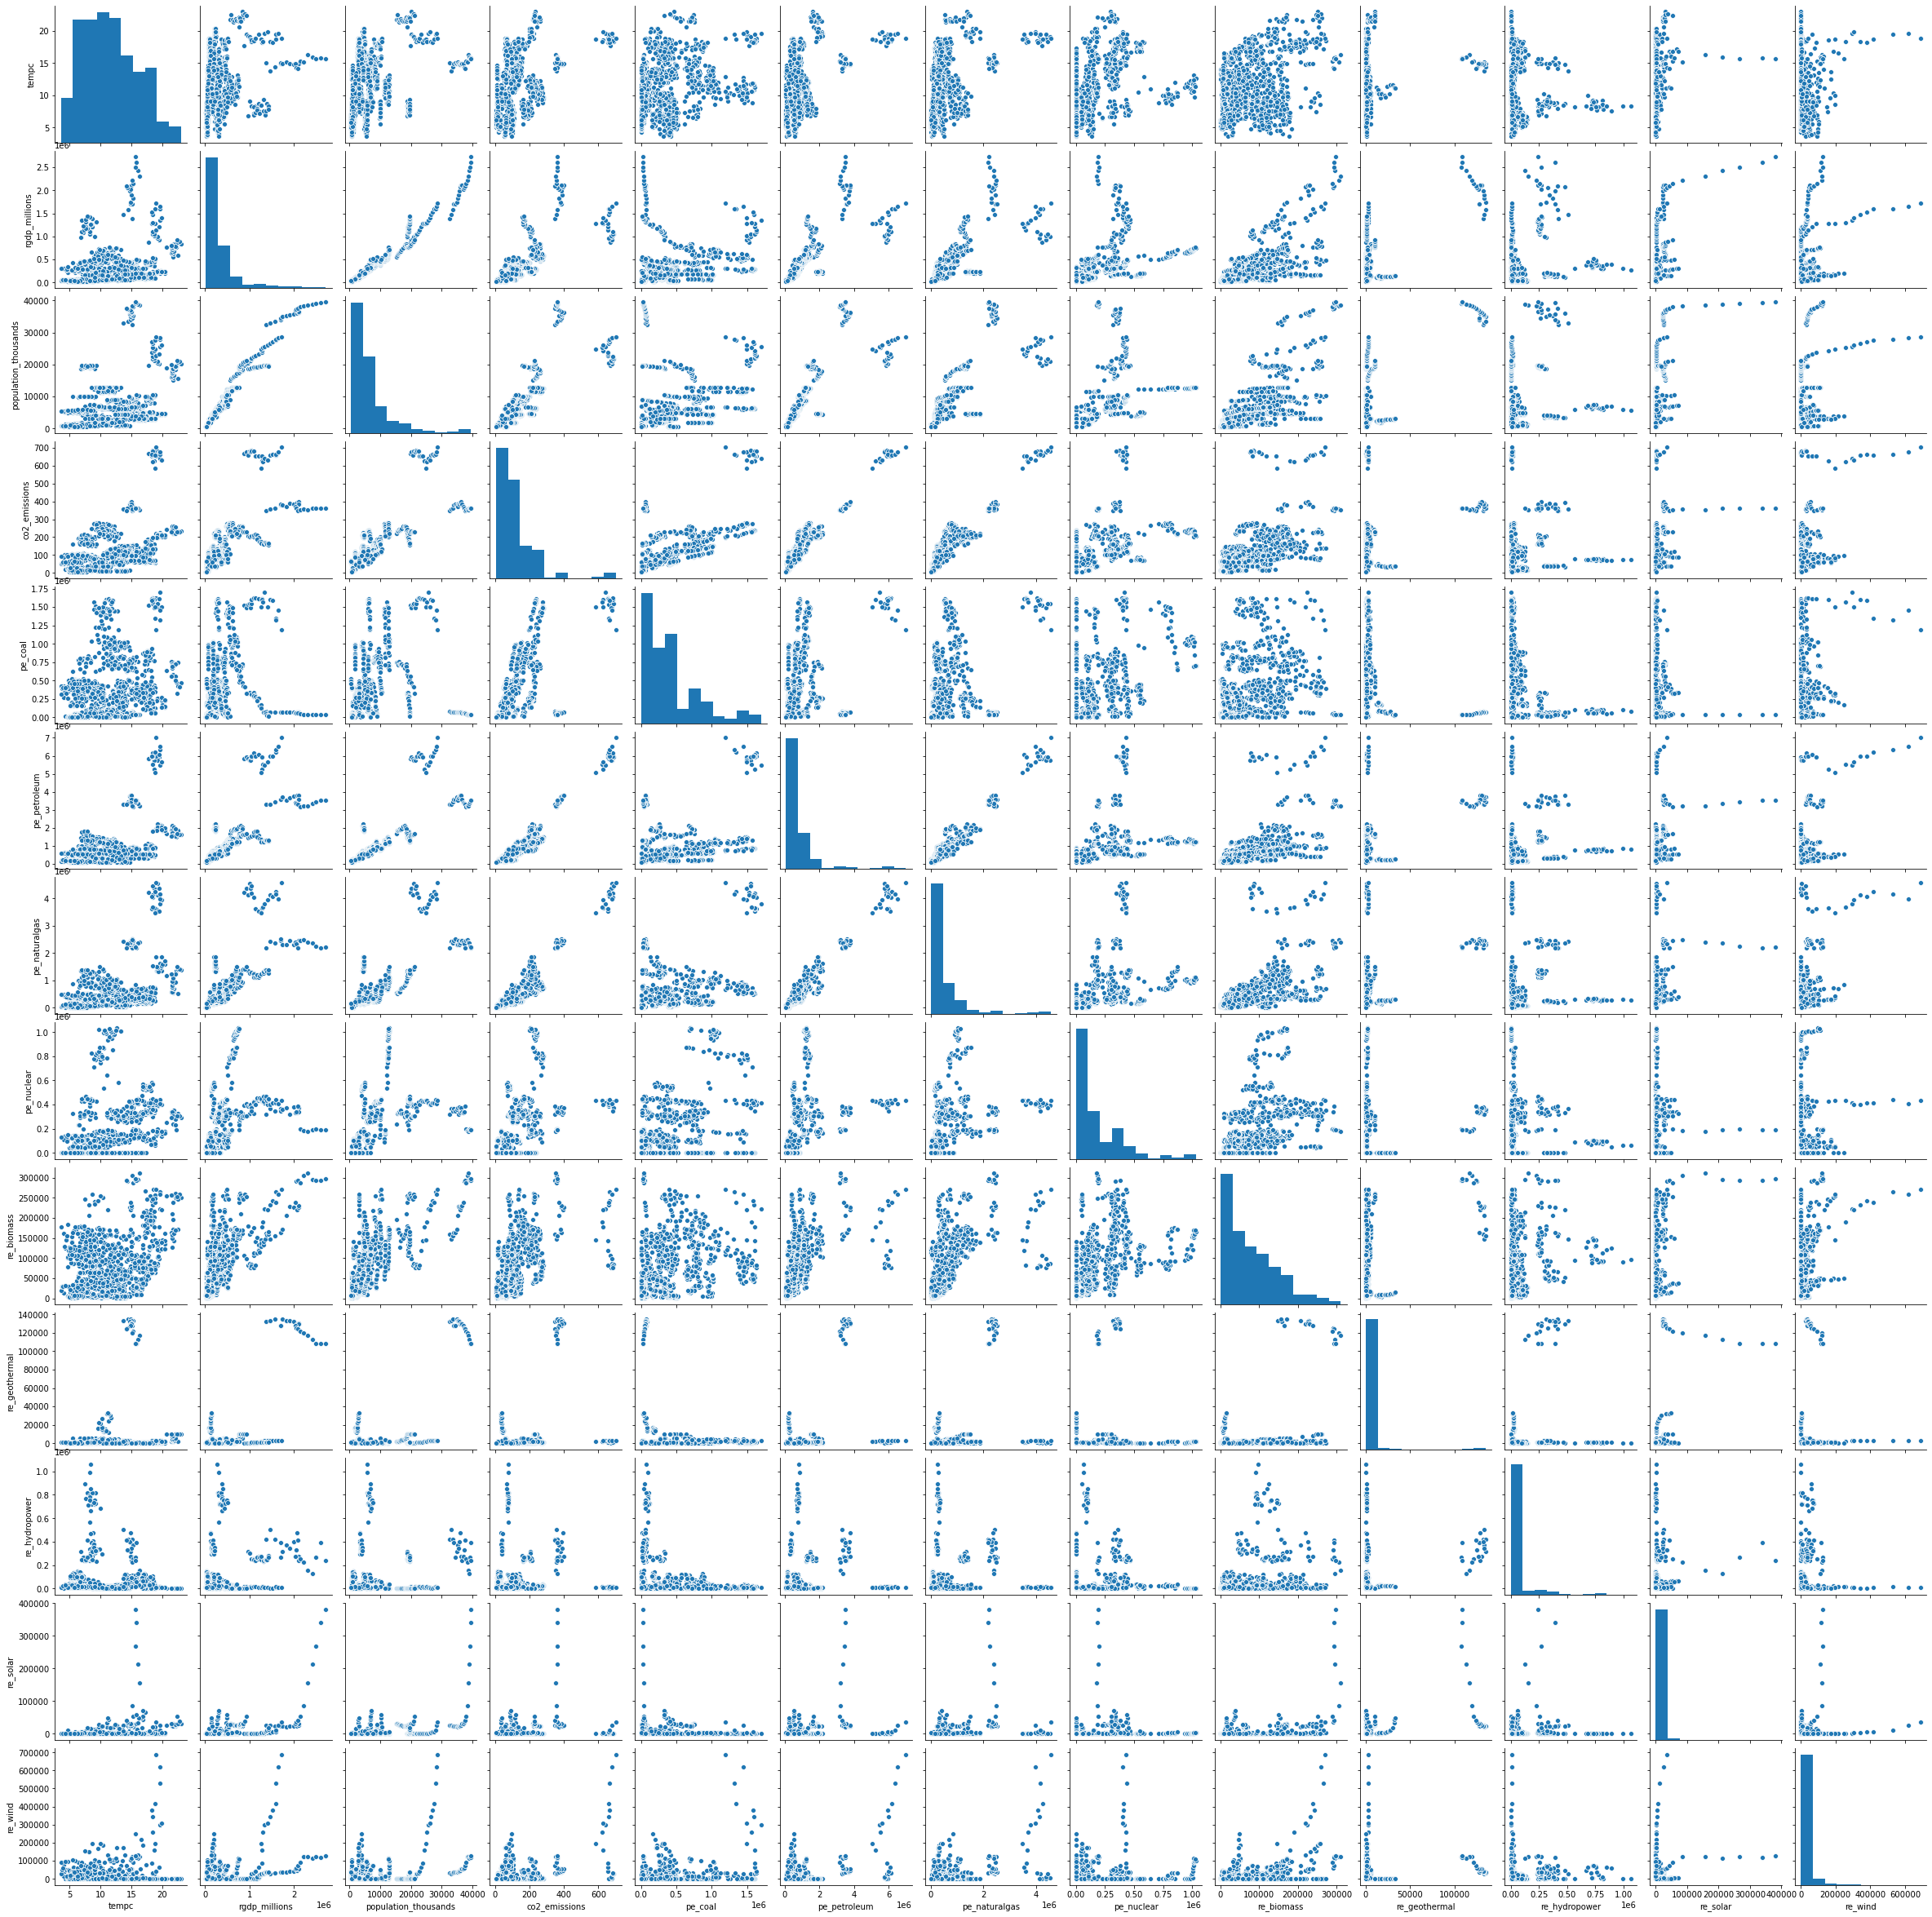

In [15]:
# Look at Pairplot
df1 = climate_df.loc[:,['tempc','rgdp_millions', 'population_thousands', 'co2_emissions',
                        'pe_coal', 'pe_petroleum', 'pe_naturalgas', 'pe_nuclear', 're_biomass',
                       're_geothermal','re_hydropower', 're_solar', 're_wind']]
sns.pairplot(df1)

In [16]:
# Create a power transformation instance
pt = PowerTransformer()

In [17]:
# Estimate the optimal parameter lambda for each feature
pt.fit(df1.values)

/Users/seanvillanoy/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


PowerTransformer()

In [18]:
# Print lambdas
pt.lambdas_

array([ 0.32240251, -4.94369329,  0.04061904,  0.16356274,  0.33749756,
       -4.94369329,  0.09632746,  0.12183216,  0.3281643 ,  0.02829815,
        0.16716634, -0.05450802, -0.03282376])

In [19]:
# Apply power transformation to each feature using the fitted lambdas
transformed_array = pt.transform(df1)

In [20]:
# Put transformed data in a data frame
df1_transformed1 = pd.DataFrame(transformed_array)
df1_transformed1.columns = df1.columns
df1_transformed1.head()

tempc  rgdp_millions  population_thousands  co2_emissions   pe_coal  \
0  1.185849            0.0              0.088314       0.538842  1.101186   
1  0.904221            0.0             -0.432404      -0.362697 -0.059211   
2  0.996184            0.0              0.170777      -0.168271  0.262177   
3  0.845810            0.0              2.210765       1.748475 -0.737233   
4 -1.071686            0.0              0.003674      -0.111880  0.244948   

   pe_petroleum  pe_naturalgas  pe_nuclear  re_biomass  re_geothermal  \
0           0.0       0.099671    0.872498    1.329841      -1.582184   
1           0.0      -0.122007    0.635303    0.407558      -0.573068   
2           0.0      -0.686080    0.869529   -1.004382      -0.334998   
3           0.0       1.970862    0.883095    1.141717       3.123518   
4           0.0       0.028009   -1.308988   -0.977540      -0.060539   

   re_hydropower  re_solar   re_wind  
0       1.173504 -0.159416 -1.037817  
1       0.435123  0.702362 -1.037817  
2       1.204396  1.168512 -1.037817  
3       2.144580  1.825175  1.185624  
4       0.140451  0.060461 -1.037817

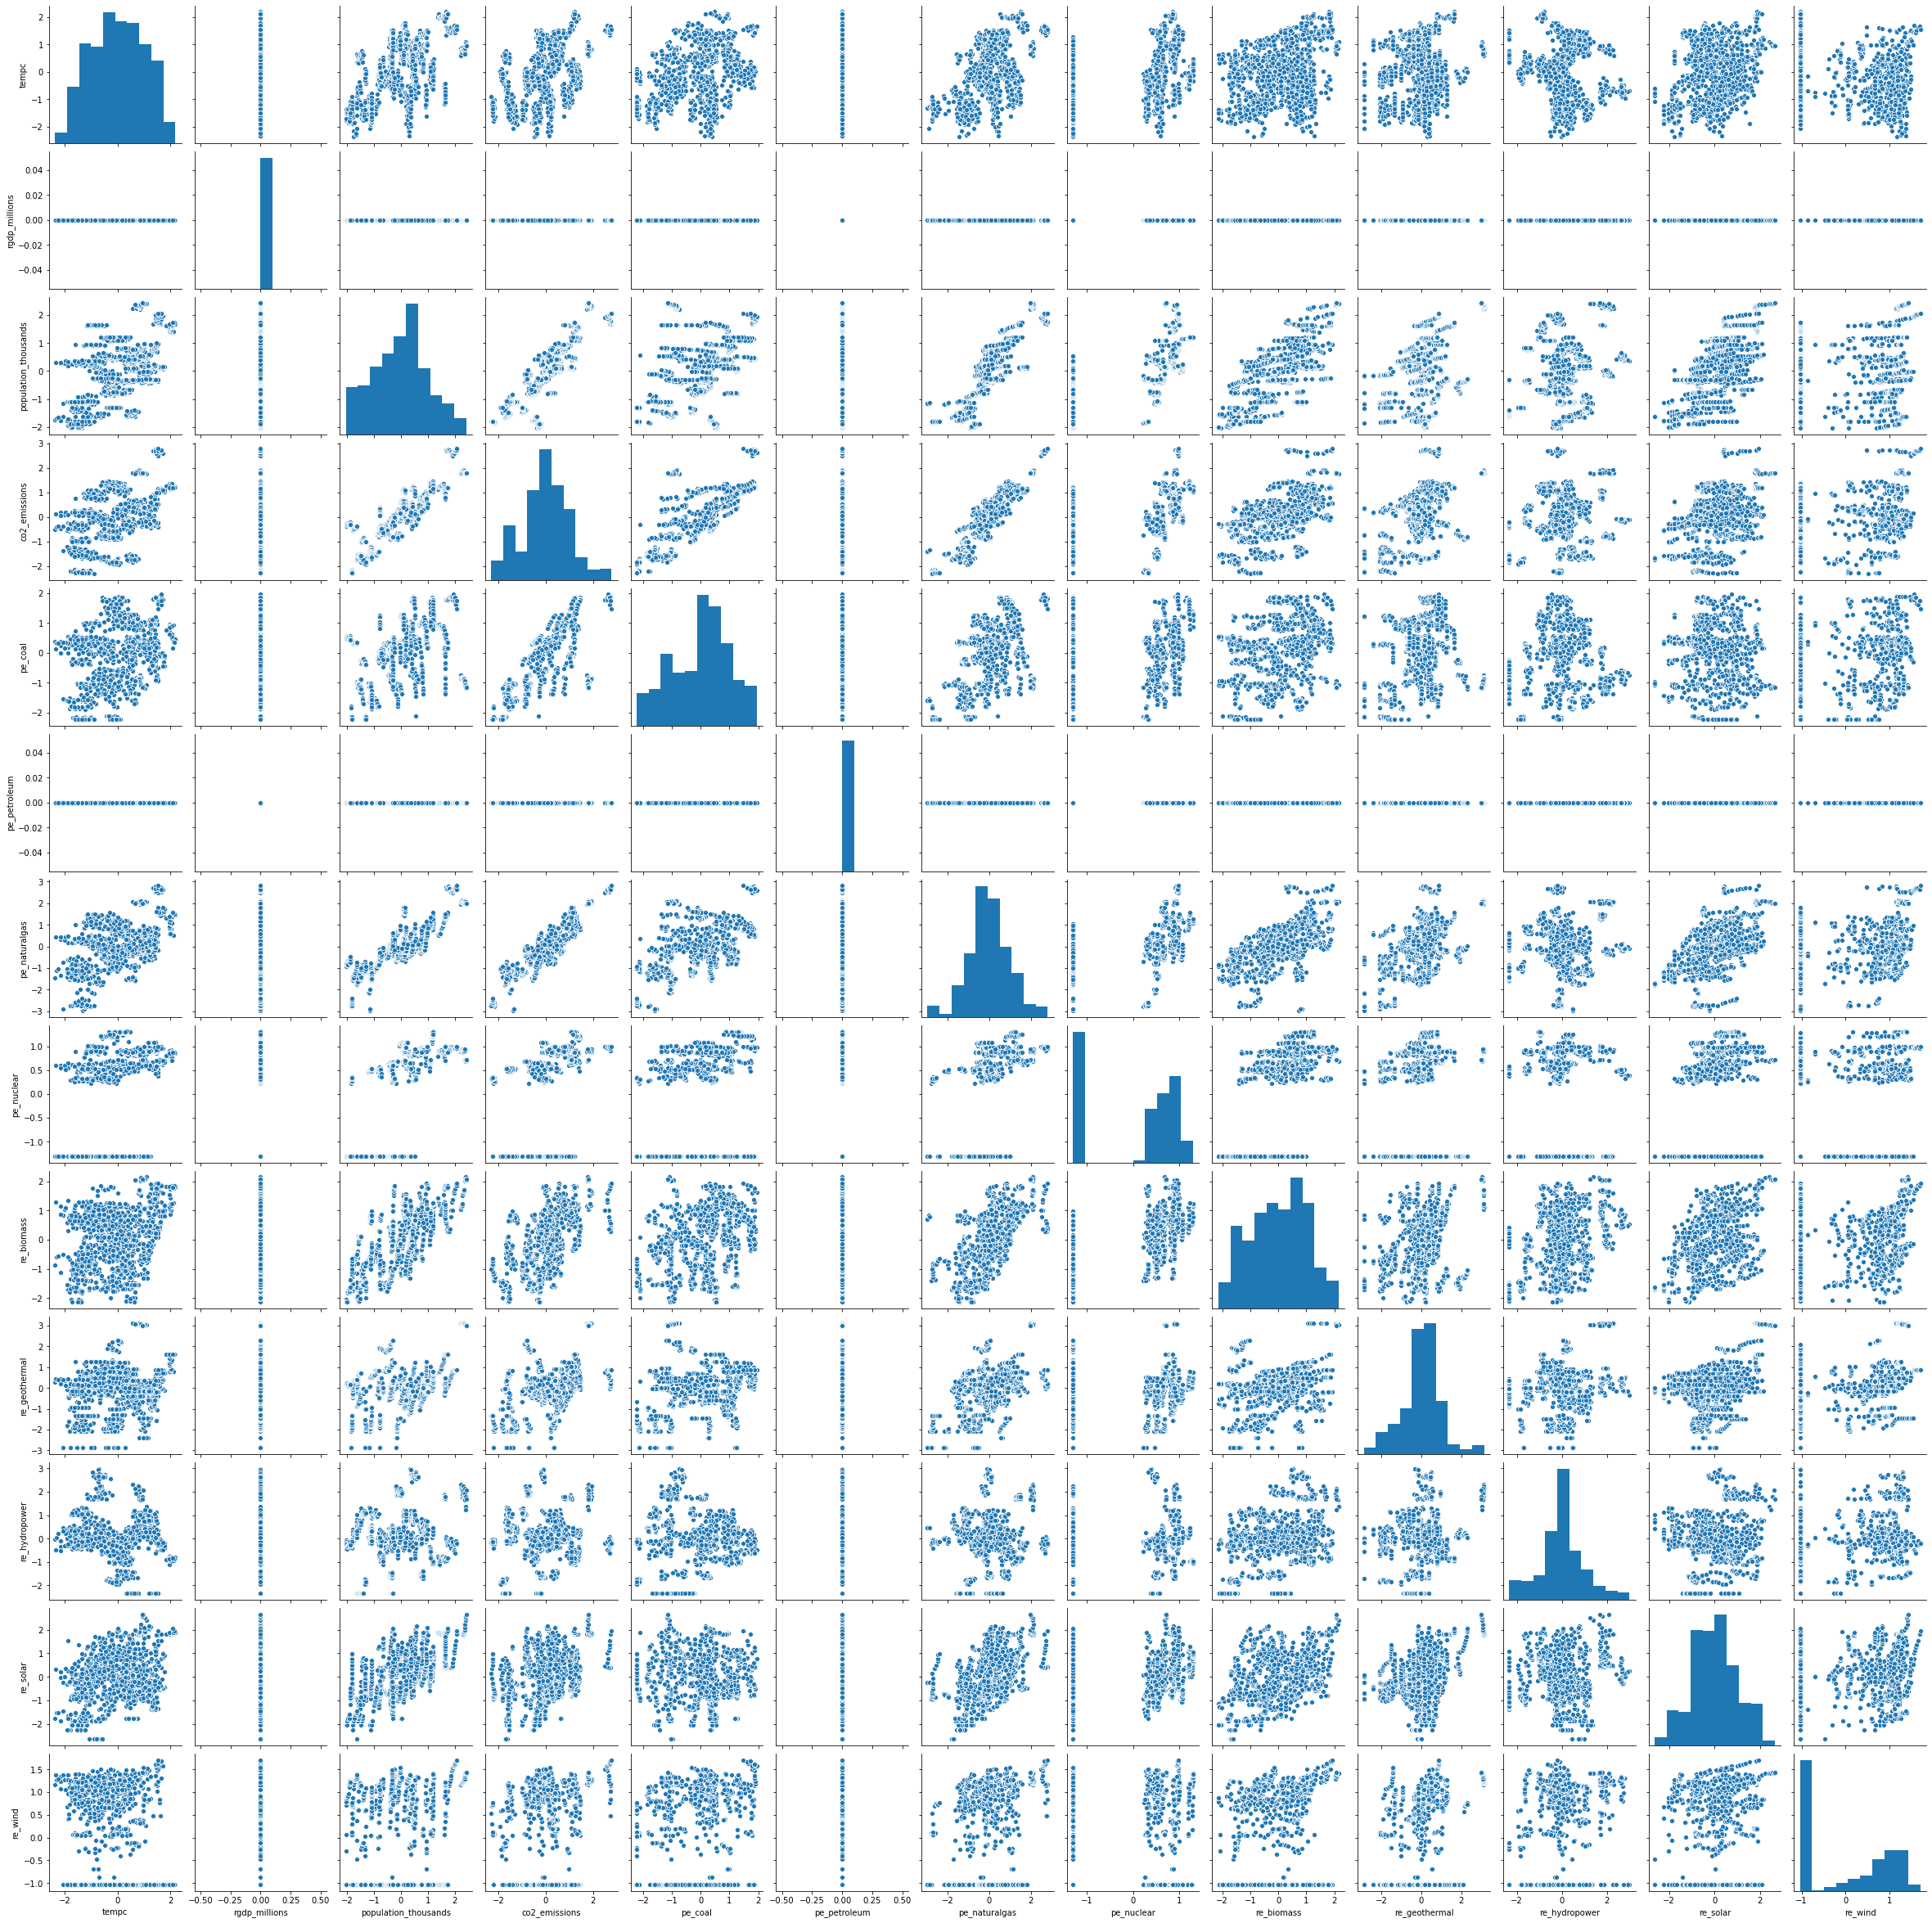

In [21]:
# Look at Pairplot after Yeo-Johnson Transformation
sns.pairplot(df1_transformed1)

# Run Regression Models

### Using untransformed data:
### Model tempc ~ rgdp_millions + population_thousands + co2_emissions + pe_coal + pe_petroleum + pe_naturalgas + pe_nuclear + re_biomass+   re_geothermal + re_hydropower + re_solar + re_wind


In [22]:
# Set the target and feature
y = df1['tempc']
X = df1.iloc[:,1:]

In [23]:
# Create instance for linear regression
reg = LinearRegression()

In [24]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [25]:
# Create predictions
y_pred = reg.predict(X)

In [26]:
# Check R squared value
reg.score(X,y)

0.43612772397544464

In [27]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

9.29150029008358
[-2.31014539e-05  8.03623232e-04  1.40411265e-01 -1.52475749e-05
 -3.70331201e-06 -7.40445358e-06  3.89126963e-06  8.60210595e-06
 -3.00934736e-05 -4.19699230e-06  5.66642280e-05 -1.74519530e-06]


In [28]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     67.23
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          9.20e-121
Time:                        12:06:33   Log-Likelihood:                -2733.9
No. Observations:                1056   AIC:                             5494.
Df Residuals:                    1043   BIC:                             5558.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2915 

### Using transformed data with optimal lambda values as suggested by Yeo-Johnson:
### Model tempc ~ rgdp_millions + population_thousands + co2_emissions + pe_coal + pe_petroleum + pe_naturalgas + pe_nuclear + re_biomass+   re_geothermal + re_hydropower + re_solar + re_wind

In [29]:
# Set the target and feature
y = df1_transformed1['tempc']
X = df1_transformed1.iloc[:,1:]

In [30]:
# Create instance for linear regression
reg = LinearRegression()

In [31]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [32]:
# Create predictions
y_pred = reg.predict(X)

In [33]:
# Check R squared value
reg.score(X,y)

0.47788489272495105

In [34]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-5.201706387547521e-16
[ 0.00000000e+00 -1.90886848e-01  2.01795587e-01  5.59478063e-02
  2.22044605e-16  3.21843667e-01  7.53889343e-02  7.85281794e-02
 -1.61883985e-02 -1.63263353e-01  2.21923734e-01 -4.08395526e-01]


In [35]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  tempc   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     95.65
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          5.68e-140
Time:                        12:06:33   Log-Likelihood:                -1155.3
No. Observations:                1056   AIC:                             2333.
Df Residuals:                    1045   BIC:                             2387.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.943e-16 

### Using transformed data of logged variables:
### Model log(tempc) ~ log(rgdp_millions) + log(population_thousands) + log(co2_emissions) + log(pe_coal) + log(pe_petroleum) + log(pe_naturalgas) + log(pe_nuclear) + log(re_biomass) +  log(re_geothermal) + log(re_hydropower) + log(re_solar) + log(re_wind)

In [36]:
# pt.lambdas_
# array([ 0.32240251, -4.94369329,  0.04061904,  0.16356274,  0.33749756,
#       -4.94369329,  0.09632746,  0.12183216,  0.3281643 ,  0.02829815,
#        0.16716634, -0.05450802, -0.03282376])
# Close to 0 -> log transform 

In [37]:
# Create a new datframe with logged variables 
# Add an abritrarily small value (ex. 0.001) to columns with 0 as min value 
df1_transformed2 = df1.copy()
df1_transformed2['tempc'] = np.log10(df1_transformed2['tempc'])
df1_transformed2['rgdp_millions'] = np.log10(df1_transformed2['rgdp_millions'])
df1_transformed2['population_thousands'] = np.log10(df1_transformed2['population_thousands'])
df1_transformed2['co2_emissions'] = np.log10(df1_transformed2['co2_emissions'])
df1_transformed2['pe_coal'] = np.log10(df1_transformed2['pe_coal'] + 0.001)
df1_transformed2['pe_petroleum'] = np.log10(df1_transformed2['pe_petroleum'] + 0.001)
df1_transformed2['pe_naturalgas'] = np.log10(df1_transformed2['pe_naturalgas'] + 0.001)
df1_transformed2['pe_nuclear'] = np.log10(df1_transformed2['pe_nuclear']+ 0.001)
df1_transformed2['re_biomass'] = np.log10(df1_transformed2['re_biomass']+ 0.001)
df1_transformed2['re_geothermal'] = np.log10(df1_transformed2['re_geothermal']+ 0.001)
df1_transformed2['re_hydropower'] = np.log10(df1_transformed2['re_hydropower']+ 0.001)
df1_transformed2['re_solar'] = np.log10(df1_transformed2['re_solar']+ 0.001)
df1_transformed2['re_wind'] = np.log10(df1_transformed2['re_wind']+ 0.001)
df1_transformed2.columns = ['log_tempc', 'log_rgdp_millions', 'log_population_thousands', 'log_co2_emissions',
       'log_pe_coal', 'log_pe_petroleum', 'log_pe_naturalgas', 'log_pe_nuclear', 'log_re_biomass',
       'log_re_geothermal', 'log_re_hydropower', 'log_re_solar', 'log_re_wind']
df1_transformed2.head()

log_tempc  log_rgdp_millions  log_population_thousands  log_co2_emissions  \
0   1.227125           5.157294                  3.640283           2.130012   
1   1.186554           4.917799                  3.415140           1.775246   
2   1.199953           5.226729                  3.675503           1.856124   
3   1.177964           6.139455                  4.511696           2.539829   
4   0.853349           5.265273                  3.604010           1.879096   

   log_pe_coal  log_pe_petroleum  log_pe_naturalgas  log_pe_nuclear  \
0     5.938151          5.720101           5.528185        5.491832   
1     5.392321          5.505747           5.421635        5.173478   
2     5.568051          5.633561           5.138581        5.488019   
3     4.917248          6.517485           6.339457        5.505413   
4     5.559216          5.569978           5.494015       -3.000000   

   log_re_biomass  log_re_geothermal  log_re_hydropower  log_re_solar  \
0        5.260558           1.230474           5.070629      2.139882   
1        4.938940           2.167320           4.555167      3.044540   
2        4.215400           2.376579           5.090117      3.578868   
3        5.200998           5.121268           5.622515      4.397732   
4        4.233580           2.613843           4.317039      2.361730   

   log_re_wind  
0    -3.000000  
1    -3.000000  
2    -3.000000  
3     4.505652  
4    -3.000000

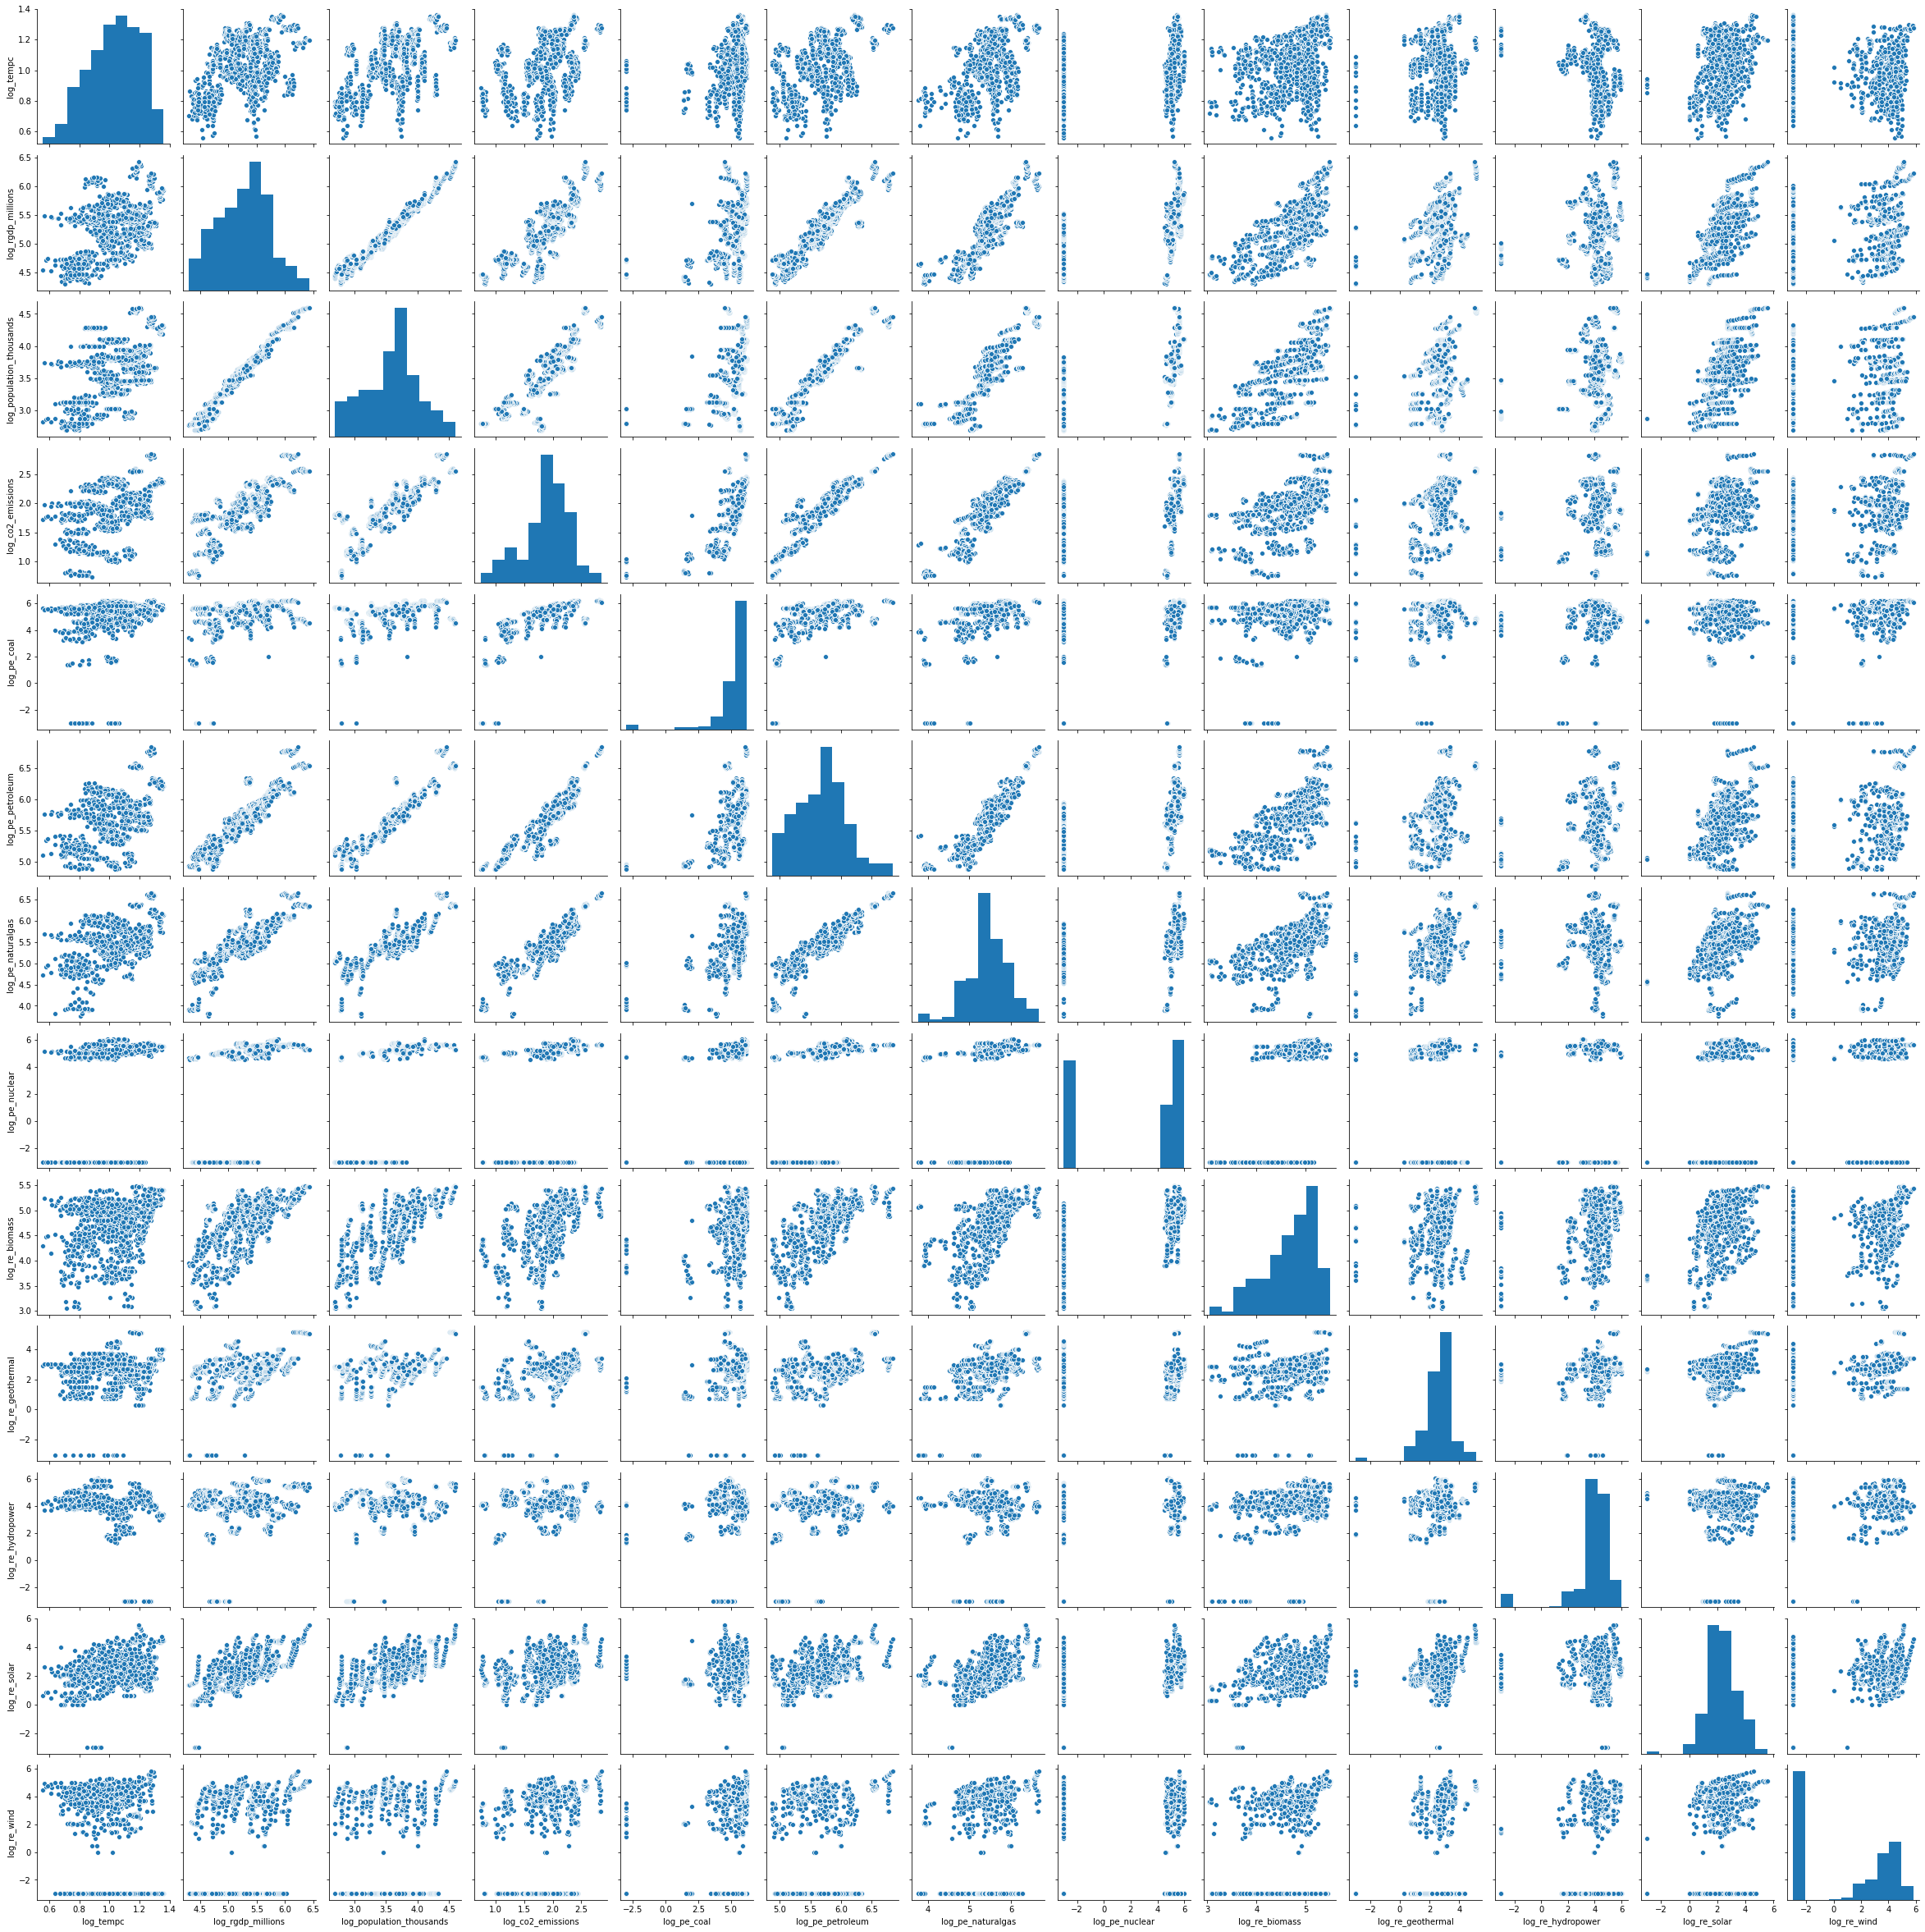

In [38]:
# Look at Pairplot after log transformation
sns.pairplot(df1_transformed2)

In [39]:
# Set the target and feature
y = df1_transformed2['log_tempc']
X = df1_transformed2.iloc[:,1:]

In [40]:
# Create instance for linear regression
reg = LinearRegression()

In [41]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [42]:
# Create predictions
y_pred = reg.predict(X)

In [43]:
# Check R squared value
reg.score(X,y)

0.5465273871838472

In [44]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

1.1515300205860017
[-5.46720932e-01  4.87523423e-01  6.27338883e-02 -1.69480072e-03
  9.62481463e-02  8.65444396e-02  4.88889870e-03 -2.26259410e-02
  5.35949044e-04 -2.81975285e-02  3.95690154e-02 -1.35327604e-02]


In [45]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_tempc   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     104.8
Date:                Sun, 04 Apr 2021   Prob (F-statistic):          1.27e-169
Time:                        12:07:22   Log-Likelihood:                 794.76
No. Observations:                1056   AIC:                            -1564.
Df Residuals:                    1043   BIC:                            -1499.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Using transformed data of logged variables:
### Model log(tempc) ~ log(rgdp_millions) + log(population_thousands) + log(co2_emissions) + log(pe_coal) + log(pe_petroleum) + log(pe_naturalgas) + log(pe_nuclear) + log(re_biomass) +  log(re_geothermal) + log(re_hydropower) + log(re_solar) + log(re_wind)

In [46]:
# Set the target and feature
y = df1_transformed2['log_co2_emissions']
X = df1_transformed2.drop('log_co2_emissions',axis='columns')

In [47]:
# Create instance for linear regression
reg = LinearRegression()

In [48]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [49]:
# Create predictions
y_pred = reg.predict(X)

In [50]:
# Check R squared value
reg.score(X,y)

0.930512246322653

In [51]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-2.6214662968006603
[ 5.77331889e-02 -3.01003266e-01  3.42095275e-01  6.80634474e-02
  6.21668784e-01  2.51329133e-01 -4.92168737e-04 -8.97712601e-02
 -6.59778393e-03  1.24592121e-02 -2.43308973e-02  6.97809842e-03]


In [52]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      log_co2_emissions   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1164.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:07:22   Log-Likelihood:                 838.62
No. Observations:                1056   AIC:                            -1651.
Df Residuals:                    1043   BIC:                            -1587.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Using transformed data of logged variables:
### Model dropping the non significant variables from above

In [53]:
# Set the target and feature
y = df1_transformed2['log_co2_emissions']
X = df1_transformed2.drop(['log_co2_emissions','log_tempc', 'log_pe_nuclear', 'log_re_geothermal'],axis='columns')

In [54]:
# Create instance for linear regression
reg = LinearRegression()

In [55]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [56]:
# Create predictions
y_pred = reg.predict(X)

In [57]:
# Check R squared value
reg.score(X,y)

0.9300827970808216

In [58]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-2.5431641222164014
[-0.33980712  0.37496038  0.06760751  0.63338824  0.25095026 -0.09198601
  0.01086064 -0.02243344  0.00591517]


In [59]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      log_co2_emissions   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:07:22   Log-Likelihood:                 835.37
No. Observations:                1056   AIC:                            -1651.
Df Residuals:                    1046   BIC:                            -1601.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Other Linear Regressions

### Model tempc ~ year

In [60]:
# Set the target and feature
y = climate_df['tempc'].values
X = climate_df['year'].values.reshape(-1,1)

In [61]:
# Create instance for linear regression
reg = LinearRegression()

In [62]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [63]:
# Create predictions
y_pred = reg.predict(X)

In [64]:
# Check R squared value
reg.score(X,y)

0.0005774416287840367

In [65]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-21.00874618118732
[0.01625196]


In [66]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6090
Date:                Sun, 04 Apr 2021   Prob (F-statistic):              0.435
Time:                        12:07:22   Log-Likelihood:                -3036.1
No. Observations:                1056   AIC:                             6076.
Df Residuals:                    1054   BIC:                             6086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0087     41.808     -0.503      0.6

### Model tempc ~ state_dummies

In [67]:
# Set the target and feature
y = climate_df['tempc'].values
X = climate_df[state_dummies].values

In [68]:
# Create instance for linear regression
reg = LinearRegression()

In [69]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [70]:
# Create predictions
y_pred = reg.predict(X)

In [71]:
# Check R squared value
reg.score(X,y)

0.9757212377747921

In [72]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

39472952904109.945
[-3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13
 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13 -3.94729529e+13]


In [73]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     872.0
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:07:22   Log-Likelihood:                -1067.2
No. Observations:                1056   AIC:                             2230.
Df Residuals:                    1008   BIC:                             2469.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3800      0.021    554.810      0.0

### Model tempc ~ year + state_dummies

In [74]:
# Set the target and feature
y = climate_df['tempc'].values
Xlist = state_dummies
Xlist.append('year')
X = climate_df.loc[:,Xlist].values

In [75]:
# Create instance for linear regression
reg = LinearRegression()

In [76]:
# Train model on training data set
reg.fit(X, y)

LinearRegression()

In [77]:
# Create predictions
y_pred = reg.predict(X)

In [78]:
# Check R squared value
reg.score(X,y)

0.976572779956681

In [79]:
# Look at model coefficients
print(reg.intercept_)
print(reg.coef_)

-21.008746181189863
[ 5.98963594  4.62663089  4.62663089  3.421875   -3.61263678 -1.55666035
  1.91556187 10.28298611  6.30908039 -4.91145833 -0.01625631 -0.19870581
 -2.35569234  1.37094907  1.98647938  7.98626894 -6.02740951  1.45238847
 -2.19702231 -4.08801557 -5.97122264  6.32886153  1.43976221 -5.5669718
 -1.72206439 -0.97101221 -4.78687921  0.47364268  0.95449285 -3.68565867
  3.74026726 -6.38220749 -0.60022096  4.25815446 -2.75384049 -1.81802399
 -1.14714857  5.85811237 -3.77825126  3.16450968  7.25036827 -1.96953914
 -5.31634049  1.76825547 -3.0926452  -0.10527146 -4.80666035 -5.76709806
  0.01625196]


In [80]:
# Check the same regression output using stats model
X = sm.add_constant(X)
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     874.5
Date:                Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:07:22   Log-Likelihood:                -1054.4
No. Observations:                1056   AIC:                             2207.
Df Residuals:                    1007   BIC:                             2450.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.5800      6.415     -3.208      0.0

# Verify if features can predict state

### Neural Network

In [81]:
df2 = climate_df.loc[:,['state_name_Alabama', 'state_name_Arizona', 'state_name_Arkansas',
       'state_name_California', 'state_name_Colorado',
       'state_name_Connecticut', 'state_name_Delaware', 'state_name_Florida',
       'state_name_Georgia', 'state_name_Idaho', 'state_name_Illinois',
       'state_name_Indiana', 'state_name_Iowa', 'state_name_Kansas',
       'state_name_Kentucky', 'state_name_Louisiana', 'state_name_Maine',
       'state_name_Maryland', 'state_name_Massachusetts',
       'state_name_Michigan', 'state_name_Minnesota', 'state_name_Mississippi',
       'state_name_Missouri', 'state_name_Montana', 'state_name_Nebraska',
       'state_name_Nevada', 'state_name_New Hampshire',
       'state_name_New Jersey', 'state_name_New Mexico', 'state_name_New York',
       'state_name_North Carolina', 'state_name_North Dakota',
       'state_name_Ohio', 'state_name_Oklahoma', 'state_name_Oregon',
       'state_name_Pennsylvania', 'state_name_Rhode Island',
       'state_name_South Carolina', 'state_name_South Dakota',
       'state_name_Tennessee', 'state_name_Texas', 'state_name_Utah',
       'state_name_Vermont', 'state_name_Virginia', 'state_name_Washington',
       'state_name_West Virginia', 'state_name_Wisconsin',
       'state_name_Wyoming', 'year', 'tempc', 'co2_emissions',
       'population_thousands', 'rgdp_millions', 'pe_coal', 'pe_petroleum',
       'pe_naturalgas', 'pe_nuclear', 're_biomass', 're_geothermal',
       're_hydropower', 're_solar', 're_wind']]
print(df2.shape)
df2.head()

(1056, 62)


state_name_Alabama  state_name_Arizona  state_name_Arkansas  \
0                 1.0                 0.0                  0.0   
1                 0.0                 0.0                  1.0   
2                 0.0                 1.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   state_name_California  state_name_Colorado  state_name_Connecticut  \
0                    0.0                  0.0                     0.0   
1                    0.0                  0.0                     0.0   
2                    0.0                  0.0                     0.0   
3                    1.0                  0.0                     0.0   
4                    0.0                  1.0                     0.0   

   state_name_Delaware  state_name_Florida  state_name_Georgia  \
0                  0.0                 0.0                 0.0   
1                  0.0                 0.0                 0.0   
2                  0.0                 0.0                 0.0   
3                  0.0                 0.0                 0.0   
4                  0.0                 0.0                 0.0   

   state_name_Idaho  ...  rgdp_millions  pe_coal  pe_petroleum  pe_naturalgas  \
0               0.0  ...         143646   867264        524929         337431   
1               0.0  ...          82756   246786        320440         264019   
2               0.0  ...         168550   369872        430092         137588   
3               0.0  ...        1378654    82651       3292194        2185029   
4               0.0  ...         184193   362423        371516         311900   

   pe_nuclear  re_biomass  re_geothermal  re_hydropower  re_solar  re_wind  
0      310336      182204             17         117660       138        0  
1      149100       86884            147          35906      1108        0  
2      307623       16421            238         123060      3792        0  
3      320194      158854         132211         419290     24988    32037  
4           0       17123            411          20751       230        0  

[5 rows x 62 columns]

In [82]:
# Set the target and feature
y = df2.iloc[:,:48].values
X = df2.iloc[:,48:].values

In [83]:
# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [84]:
# Scale the training and testing input features using StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [85]:
# Create a sequential model
model = Sequential()

In [86]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
number_outputs = 48

In [87]:
# Add the first input layer where the input dimensions are the 14 columns of non state features
model.add(Dense(units= hidden_nodes_layer1 , activation='relu', input_dim = number_input_features))

In [88]:
# Add output layer using 48 output nodes for the 48 states
model.add(Dense(number_outputs, activation="softmax"))

In [89]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [90]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1500      
_________________________________________________________________
dense_1 (Dense)              (None, 48)                4848      
Total params: 6,348
Trainable params: 6,348
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Use the training data to fit (train) the model
model.fit(X_train_scaled, y_train, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
25/25 - 0s - loss: 3.7693 - accuracy: 0.0581
Epoch 2/100
25/25 - 0s - loss: 3.3734 - accuracy: 0.1730
Epoch 3/100
25/25 - 0s - loss: 3.0672 - accuracy: 0.2904
Epoch 4/100
25/25 - 0s - loss: 2.7839 - accuracy: 0.3965
Epoch 5/100
25/25 - 0s - loss: 2.5255 - accuracy: 0.4735
Epoch 6/100
25/25 - 0s - loss: 2.2888 - accuracy: 0.5606
Epoch 7/100
25/25 - 0s - loss: 2.0677 - accuracy: 0.6301
Epoch 8/100
25/25 - 0s - loss: 1.8614 - accuracy: 0.6679
Epoch 9/100
25/25 - 0s - loss: 1.6769 - accuracy: 0.7260
Epoch 10/100
25/25 - 0s - loss: 1.5093 - accuracy: 0.7992
Epoch 11/100
25/25 - 0s - loss: 1.3629 - accuracy: 0.8144
Epoch 12/100
25/25 - 0s - loss: 1.2346 - accuracy: 0.8586
Epoch 13/100
25/25 - 0s - loss: 1.1176 - accuracy: 0.8952
Epoch 14/100
25/25 - 0s - loss: 1.0172 - accuracy: 0.9091
Epoch 15/100
25/25 - 0s - loss: 0.9262 - accuracy: 0.9141
Epoch 16/100
25/25 - 0s - loss: 0.8457 - accuracy: 0.9268
Epoch 17/100
25/25 - 0s - loss: 0.7742 - accuracy: 0.9356
Epoch 18/100
25/25 - 0s

In [92]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.0676 - accuracy: 0.9848
Normal Neural Network - Loss: 0.06757946312427521, Accuracy: 0.9848484992980957
